<a href="https://colab.research.google.com/github/AryelleSiqueira/data-science/blob/main/lista_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lista 1: Um pouco mais sobre CDFs, BoxPlots, histogramas...

## Forma de entrega

Salve essa página (com código e respostas geradas) em ``.pdf`` e submeta o documento na atividade do AVA (apenas um integrante do grupo deve fazer a submissão).

## Grupos

* **Graduação:** grupo de até 3 pessoas
* **Pós-Graduação:** individual

## Integrantes do grupo

1. **Nome(s):** Aryelle Gomes Siqueira

2. **Matrícula(s):** 2017100548

3. **E-mail(s) institucional(is):** aryelle.siqueira@edu.ufes.br

3. **Curso(s):** Engenharia da Computação

4. **Link do seu Colab com suas soluções (para que o professor possa acessar e rodar o código):** https://colab.research.google.com/drive/1u3SSQlePocesYMMwAelonryPvSMlAn00#scrollTo=OqwCQmTe2RGv

## Sobre a Avaliação

Todas questões têm o mesmo peso/valor.

## Questão 1

O objetivo desta questão é comparar as **Funções de Distribuição** (i.e., CDF) teórica e empírica de algumas distribuições contínuas bem conhecidas.

Lembre-se que nós conversamos um pouco sobre CDFs na Aula 3.

### Exemplo

Vamos começar com um exemplo sobre a distribuição Uniforme contínua.

A biblioteca ``scipy`` possui funcionalidades para gerar números pseudo-aleatórios e para computar valores da CDF teórica da distribuição. Leia mais sobre em https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html.

A biblioteca ``statsmodels`` possui funcionalidades para computar a CDF empírica de um conjunto de observações.

In [15]:
from scipy.stats import uniform
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [16]:
def plot_uniform_cdf(loc, scale, n):
  # gera 'n' números de uma distribuição uniforme contínua no
  # intervalo [loc, loc + scale]
  r = uniform.rvs(loc = loc, scale = scale, size = n)

  # plota a CDF empírica dos números gerados
  cdf = ECDF(r)
  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  # plota a CDF teórica de uma distribuição contínua uniforme no intervalo
  # [loc, loc + scale]
  plt.plot(cdf.x, uniform.cdf(cdf.x, loc = loc, scale = scale),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  # Ajustes de rótulos e tamanho da figura...
  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

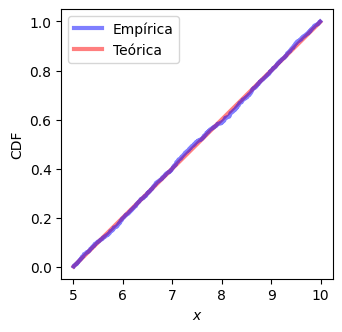

In [17]:
plot_uniform_cdf(5, 5, 1000)

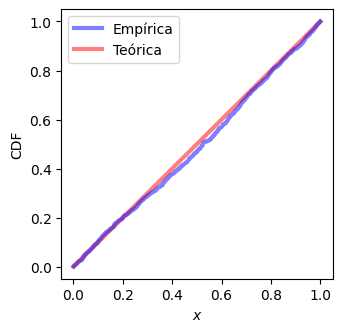

In [19]:
plot_uniform_cdf(0, 1, 1000)

### Parte (*a*)

Repita a análise acima para a distribuição normal. Lembre-se que a distribuição normal possui dois parâmetros: $\mu$ e $\sigma$.

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição normal.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição normal;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [21]:
from scipy.stats import norm

In [22]:
def plot_normal_cdf(mu, sigma, n):
  r = norm.rvs(loc=mu, scale=sigma, size=n)

  cdf = ECDF(r)

  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  plt.plot(cdf.x, norm.cdf(cdf.x, loc = mu, scale = sigma),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

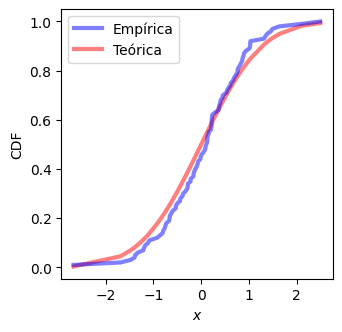

In [23]:
plot_normal_cdf(0, 1, 100)

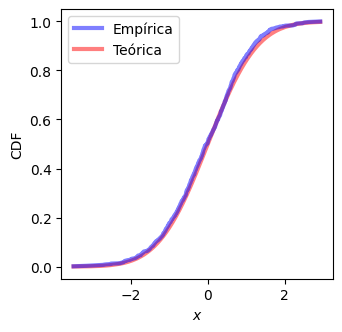

In [24]:
plot_normal_cdf(0, 1, 1000)

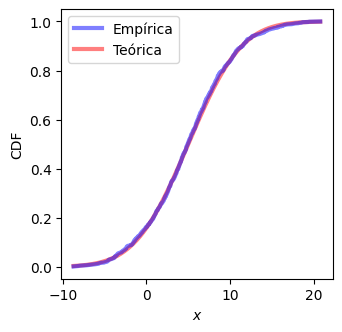

In [25]:
plot_normal_cdf(5, 5, 1000)

### Parte (*b*)

Repita a análise inicial para a distribuição exponencial. Lembre-se, dado um parâmetro $\lambda > 0$, a densidade da distribuição exponencial é:
$$f(x) = \lambda e^{-\lambda x}\text{, } x > 0.$$

Consulte https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição exponencial.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição exponencial;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

**ATENÇÃO:** Leia com atenção a documentação da biblioteca mencionada para entender como o parâmetro $\lambda$ deve ser fornecido. O $\lambda$ da definição acima não é o mesmo que o `scale` da biblioteca.

In [26]:
from scipy.stats import expon

In [27]:
def plot_exponential_cdf(lambda_, n):
  r = expon.rvs(scale=1/lambda_, size=n)

  cdf = ECDF(r)

  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  plt.plot(cdf.x, expon.cdf(cdf.x, scale = 1/lambda_),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)


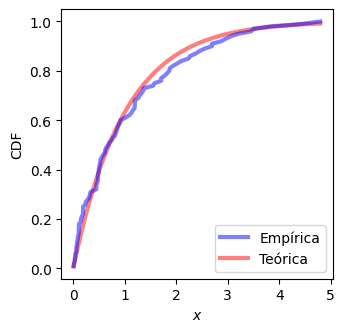

In [28]:
plot_exponential_cdf(1, 100)

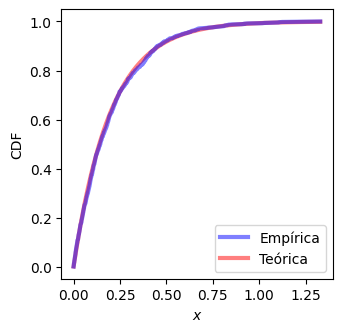

In [29]:
plot_exponential_cdf(5, 1000)


### Parte (*c*)

Agora as coisas ficam mais interessantes...

Repita a análise inicial para a distribuição de pareto. Lembre-se, dado um parâmetro $b > 0$, a densidade da distribuição de pareto é:
$$f(x) = \frac{b}{x^{b+1}}\text{, } x \ge 1.$$

Consulte https://docs.scipy.org/doc/scipy/tutorial/stats/continuous_pareto.html para gerar números pseudo-aleatórios e para computar a CDF da distribuição de pareto.

Você deve:
1. Completar a função abaixo para gerar gráficos comparativos entre as CDFs empíricas e teóricas da distribuição de pareto;
2. Executar seu código, variando os parâmetros da distribuição e número de elementos gerados.

In [32]:
from scipy.stats import pareto

In [33]:
def plot_pareto_cdf(b, n):
  r = pareto.rvs(b, size=n)

  cdf = ECDF(r)

  plt.plot(cdf.x, cdf.y, linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  plt.plot(cdf.x, pareto.cdf(cdf.x, b),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CDF');
  plt.gcf().set_size_inches(3.5, 3.5)

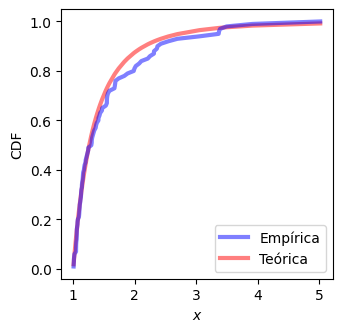

In [34]:
plot_pareto_cdf(3, 100)

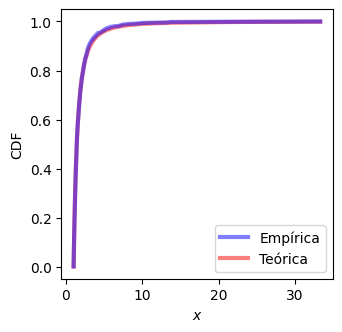

In [35]:
plot_pareto_cdf(2, 1000)

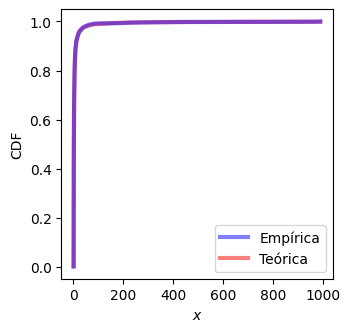

In [36]:
plot_pareto_cdf(1, 1000)

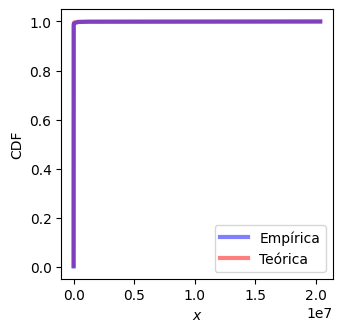

In [37]:
plot_pareto_cdf(0.5, 1000)

Após fazer as figuras, você provavelmente observou que para valores pequenos de $b$, a CDF da distribuição de pareto é bastante difícil de ler, uma vez que fica praticamente "colada" às retas $x = 0$ e $y = 1$.

Esse fenômeno ocorre porque, quando $b$ é pequeno, valores muito grandes (i.e., discrepantes ou *outliers*) têm uma probabilidade não negligível de ocorrerem.

Quando observamos o comportamento das figuras acima, devemos modificar a forma de visualizar a distribuição:
1. Devemos gerar uma figura para a CCDF (*Complementary Cumulative Distribution Function*). A CCDF de um valor $x$ é definida como 1 menos a CDF de $x$.
2. Devemos colocar os eixos $x$ e $y$ em escala logarítmica.

Complete a função abaixo para gerar a figura da forma descrita acima e gere os gráficos para os mesmos casos que testou anteriormente.

In [38]:
def plot_pareto_ccdf(b, n):
  r = pareto.rvs(b, size=n)

  cdf = ECDF(r)

  f = lambda arr: [1-val for val in arr]

  plt.loglog(cdf.x, f(cdf.y), linewidth = 3, alpha = 0.5, color = 'blue',
           label = 'Empírica')

  plt.plot(cdf.x, f(pareto.cdf(cdf.x, b)),
           alpha = 0.5, label = 'Teórica', color = 'red',
           linewidth = 3, zorder = 0);

  plt.legend(loc = 'best');
  plt.xlabel(r'$x$');
  plt.ylabel(r'CCDF');
  plt.gcf().set_size_inches(3.5, 3.5)

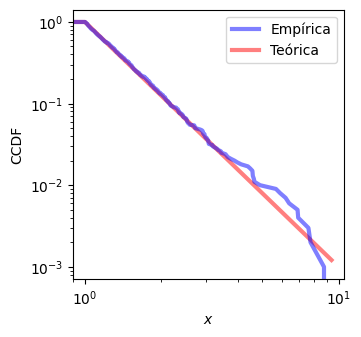

In [39]:
plot_pareto_ccdf(3, 1000)

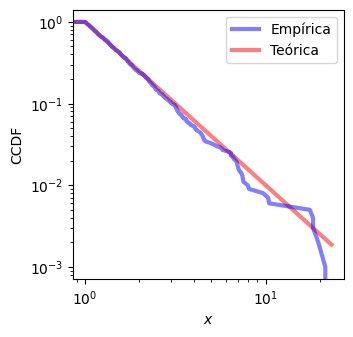

In [40]:
plot_pareto_ccdf(2, 1000)

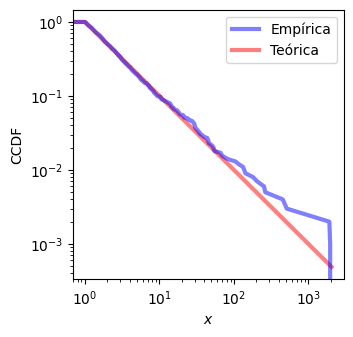

In [41]:
plot_pareto_ccdf(1, 1000)

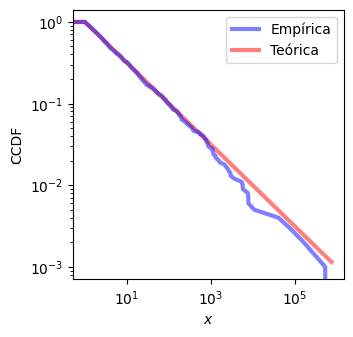

In [42]:
plot_pareto_ccdf(0.5, 1000)

## Questão 2

Esta questão é **obrigatória** apenas para alunos da **pós-graduação**.

O objetivo desta questão é entender o comportamento da **parte (*c*)** da questão anterior.

Você deve ler as duas primeiras seções do artigo https://arxiv.org/pdf/cond-mat/0412004.pdf e fazer um resumo (de no máximo uma página). Certifique-se de incluir no seu resumo, entre outras informações que achar relevantes, o motivo de a CCDF da distribuição de pareto ter a forma que tem quando ambos os eixos estão em escala logarítmica.

## Questão 3

Primeiro, você deve ler os artigos abaixo.
1. [Common pitfalls in statistical analysis: The use of correlation techniques](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5079093/)
2. [Chocolate Consumption, Cognitive Function,
and Nobel Laureates](https://utw10426.utweb.utexas.edu/quest/Q7/choco.pdf)

Resumindo o que foi lido nos artigos, responda as seguintes questões:

1. O que é o coeficiente de correlação?
2. Quando o coeficiente de correlação é útil e quando ele pode ser a ferramenta errada para analisar a relação entre duas variáveis?
3. Qual a diferença entre causalidade e correlação?

**Observação 1:** é esperado que a resposta das três perguntas utilize aproximadamente duas páginas A4.

**Observação 2:** você pode consultar outras fontes para responder as questões acima. No entanto, é esperado que as respostas sejam no contexto do conteúdo dos artigos.

#### *Q1*
> O coeficiente de correlação de Pearson, ou simplesmente coeficiente de correlação (***r***), representa o grau em que duas variáveis se relacionam, podendo variar entre -1 e 1. Quanto maior em módulo, maior é a correlação entre as variáveis. De forma mais simples, dado um conjunto de dados representado por pontos em um gráfico de dispersão, o módulo do coeficiente ***r*** indica o quão próximos estão esses pontos de uma linha imaginária que passa por eles (obtida através da regressão linear). Ou seja, quanto menos dispersos ao redor da linha, mais próximo de 1 será o módulo de ***r***. Quanto ao sinal do coeficiente, este representa o tipo de correlação entre as variáveis, por exemplo: se a medida que o valor de uma variável aumenta a outra também aumenta, ***r*** será positivo, por outro lado, se o aumento de uma variável estiver associado à diminuição da outra, o coeficiente ***r*** será negativo. Voltando para a representação no gráfico de disperção, o sinal do coeficiênte é dado pela inclinação da reta imaginária que passa por entre os pontos.


#### *Q2*
> O coeficiente de correlação é útil quando estamos procurando por uma relação linear entre duas variáveis. Entretanto, há casos onde ele pode nos levar a conclusões precipitadas, por exemplo: quanto existe uma relação entre as variáveis, mas ela não é linear, o coeficiente de correlação pode sugerir que não há relação (correlação próxima a zero); quando existe um ou mais outliers, valores extremos que não seguem o padrão geral, o valor do coeficiente de correlação pode ser distorcido significativamente, tornando-o menos representativo do todo; quando a quantidade de amostras é insuficiente e portanto o coeficiente de correlação pode ser pouco confiável; quando mais de uma amostra foi coletada de um mesmo indivíduo e portanto os dados não são interdependentes; dentre alguns outros casos.

#### *Q3*
> O fato de duas variáveis possuem **correlação**, não significa que uma é consequência da outra, ou em outras palavras, uma não necessariamente **causa** ou influencia no comportamento da outra. A correlação pode se dar ao fato de que as variáveis são causadas ou influenciadas por um fator em comum, uma terceira variável, como por exemplo: suponha que verificamos a existência de uma correlação positiva entre o consumo de sorvete e o número de afogamentos em uma cidade, ou seja, estes variam juntos. Mas isso não quer dizer que o aumento do consumo de sorvete aumenta o número de afogamentos, muito menos o contrário. Nesse caso, a correlação se dá por um terceiro fator: o calor do verão.




## Questão 4

Obtenha o conjunto de dados disponível no AVA da disciplina para essa questão. O conjunto de dados possui duas colunas: `type` e `score`. Você pode pensar nesses dados como sendo o resultados de medições (`score`) realizadas em um conjunto de objetos que pode ser de três tipos diferentes (`type`).

### Parte (a)

Leia o conjunto de dados e armazene-o em um `DataFrame` do `Pandas`.

In [43]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('dados_questao_4.csv')

# df.head()

### Parte (b)

Usando a biblioteca `seaborn`, Faça o *BoxPlot* da variável `score` para todos os objetos, independentemente do tipo.

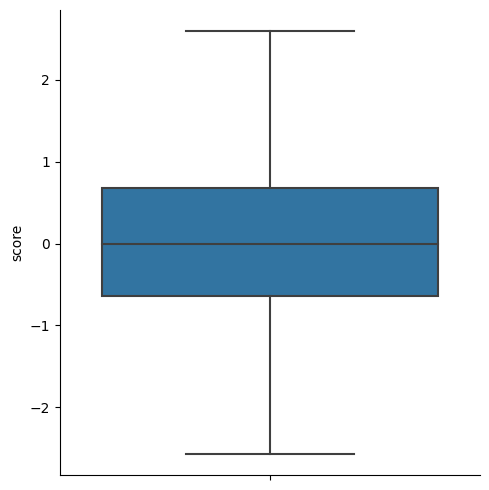

In [44]:
sns.catplot(y="score", kind="box", data=df)

Agora, faça, em uma mesma figura, os *BoxPlots* para a variável `score` de acordo com a variável `type`. Isto é, um *BoxPlot* da variável `score` para cada valor de `type`. Novamente, use a biblioteca `seaborn`.

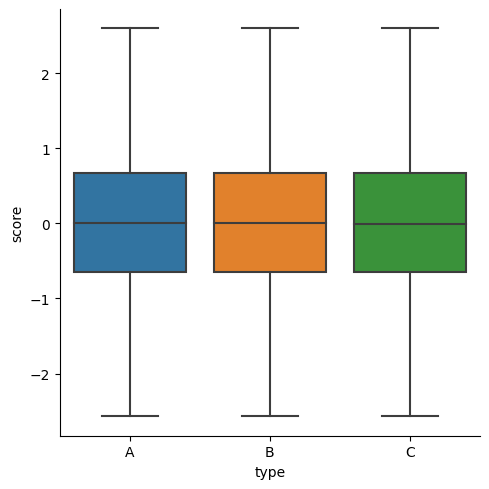

In [45]:
sns.catplot(x="type", y="score", kind="box", data=df)

Com base **apenas** nos *BoxPlots*, o que é possível afirmar sobre a dispersão/distribuição dos dados das três variáveis? Você diria que as três distribuições são similares?

***Resposta:***
> Olhando apenas para os boxplots, pode-se afirmar que a distribuição dos scores parece semelhante, pois os valores encontram-se dentro do mesmo intervalo (delimitado pelos bigodes) para os 3 tipos, onde a maioria destes valores concentram-se dentro de um mesmo intervalo (indicados pelas linhas inferiores e superiores das caixas). Além disso, os scores possuem o mesmo valor médio para os 3 tipos (linhas dentro das caixas).


### Parte (c)

Agora:

1. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os histogramas.

2. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça as CDFs empíricas (vide Questão 1).

3. Repita a Parte (b), mas agora, ao invés de fazer os *BoxPlots*, faça os gráficos de Violino.



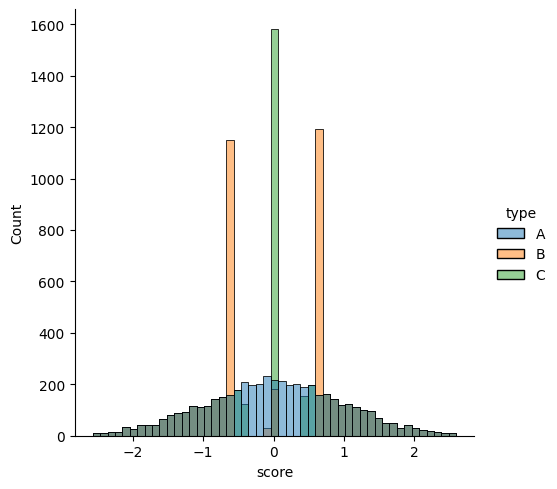

In [46]:
# 1. Histogramas
sns.displot(df, x="score", hue="type")

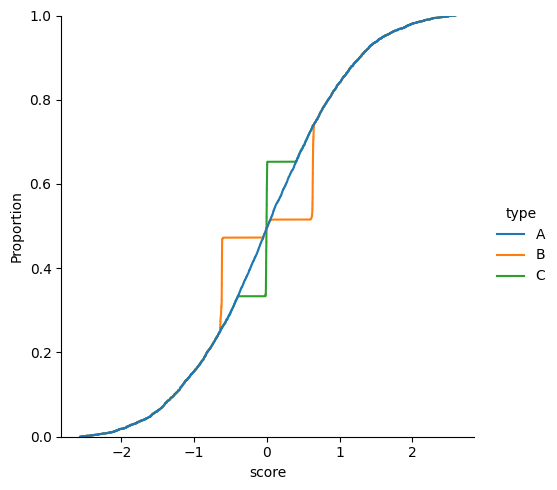

In [47]:
# 2. CDFs
sns.displot(df, x="score", hue="type", kind="ecdf")

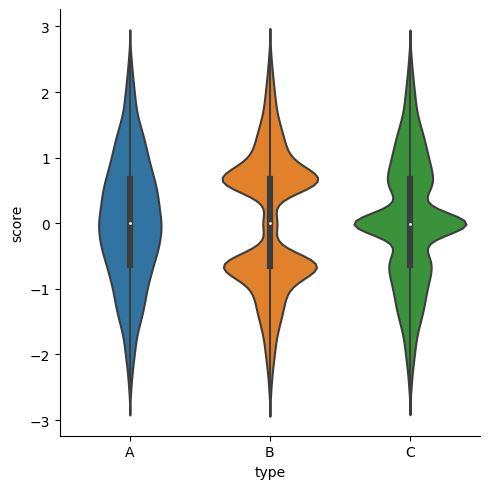

In [48]:
# 3. Gráficos de Violino
sns.catplot(data=df, x="type", y="score", kind="violin")

Revisitando a conclusão da Parte (b)...

Com base nessas novas figuras, o que é possível dizer sobre a dispersão/distribuição das três variáveis? Você diria que as três distribuições são similares?

***Resposta:***
> Apesar de ter vários pontos similares, as 3 variáveis se diferem bastante nas distribuições de seus valores centrais. A maioria dos valores de fato encontra-se no mesmo intervalo, e com mesmos valores médios, mas com é possível ver claramente nos histogramas e gráficos violino, os scores do tipo **A** seguem uma distribuição padrão, enquanto os dos tipos **B** e **C** seguem distribuições multimodais. É possível ainda observar, discontinuidades nas distribuições dos scores B e C, indicando uma ausência de valores em certos intervalos.

## Questão 5

Ainda no espírito das duas questões anteriores.

Leia o conjunto de dados, disponível no AVA, para a Questão 5 e carregue os dados em um `DataFrame` do `Pandas`. O arquivo contém um conjunto de pontos no plano, ou seja, uma coleção de pares ($x$, $y$).

Na verdade, o arquivo é uma coleção de vários conjuntos de dados. O arquivo possui três colunas:
- `dataset` indica a qual conjunto de dados um ponto pertence
- `x` indica a coordenada $x$ de cada ponto do conjunto
- `y` indica a coordenada $y$ de cada ponto do conjunto



In [49]:
df_q5 = pd.read_csv('dados_questao_5.csv')

# df_q5.head()

### Parte (a)

Para cada um dos 13 conjuntos de dados disponível no arquivo, calule e imprima:
1. A média dos valores das colunas `x` e `y`
2. O desvio padrão dos valores das colunas `x` e `y`
3. A correlação linear entre as colunas `x` e `y`

Com base nos valores observados, formule uma hipótese sobre o grau de similaridade entre os diversos conjuntos de dados. Em outras palavras, vocês diriam que eles são similares ou diferentes?

**Observação:** tente modularizar seu código e utilizar os recursos do `Pandas`, por exemplo, `groupby`.

In [50]:
datasets = df_q5.groupby('dataset')

for ds_name, ds_data in datasets:
  print(ds_name.upper())
  print('Mean  X: ', ds_data['x'].mean(), ' | Y: ', ds_data['y'].mean())
  print('Std   X: ', ds_data['x'].std(), ' | Y: ', ds_data['y'].std())
  print('XY Corr: ', ds_data[['x', 'y']].corr()['x']['y'])
  print('--------------------------------------------------------')

# HIPOTESE:
# A priori, parecem conjuntos de dados bastante similares, mas os indicadores usados
# não são o suficiente para concluírmos muita coisa. O fato de que todos os conjuntos
# possuem valores muito proximos de média e desvio padrão indica que compartilham
# características como tendência central e variabilidade. Os coeficientes de correlação
# muito próximos indicam que possuem relações lineares entre X e Y muito parecidas.
# Porém, sabe-se que há diversos casos em que esse coeficiente não é um bom indicador.

AWAY
Mean  X:  54.266099784204926  | Y:  47.83472062488412
Std   X:  16.769824954157365  | Y:  26.939743418883353
XY Corr:  -0.06412835215474474
--------------------------------------------------------
BULLSEYE
Mean  X:  54.268730022378875  | Y:  47.830823155217814
Std   X:  16.76923949342675  | Y:  26.935726689885946
XY Corr:  -0.06858639425794848
--------------------------------------------------------
CIRCLE
Mean  X:  54.267319706173936  | Y:  47.83771726721831
Std   X:  16.7600126596722  | Y:  26.93003608783034
XY Corr:  -0.06834335645012041
--------------------------------------------------------
DINO
Mean  X:  54.26327323943662  | Y:  47.832252816901416
Std   X:  16.76514203911679  | Y:  26.935403486939116
XY Corr:  -0.06447185270095158
--------------------------------------------------------
DOTS
Mean  X:  54.26030345121761  | Y:  47.83982920875564
Std   X:  16.76773548843259  | Y:  26.93019151808552
XY Corr:  -0.060341441993538816
-----------------------------------------------

### Parte (b)

Agora, vamos testar a hipótese estabelecida no item anterior. Faça um gráfico, para cada um dos 13 conjuntos de dados, marcando os pontos de cada conjunto no plano.

Com base nos gráficos, o que pode ser dito sobre o grau de similaridade entre os diversos conjuntos de dados? Em outras palavras, vocês diriam que eles são similares ou diferentes?

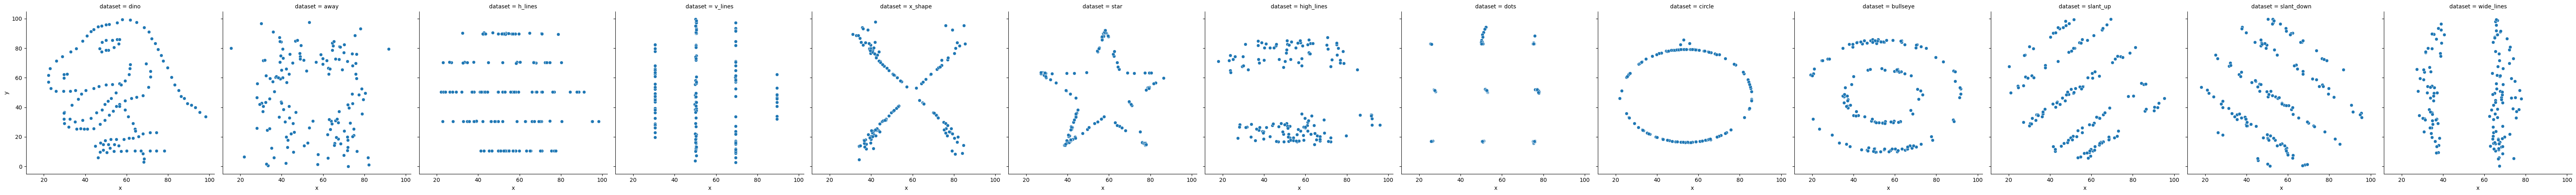

In [51]:
sns.relplot(x='x', y='y', col='dataset', data=df_q5)

# RESPOSTA
# Os conjuntos dados são muito diferentes. Como previ, a média, o desvio padrão e
# o coeficiente de correlação não são o suficiente para concluír-se muita coisa
# sobre um conjunto de dados.

## Referências (Spoiler Alert!)

Os dados de algumas questões foram obtidos em https://www.research.autodesk.com/publications/same-stats-different-graphs/. Para não estragar a surpresa, sugiro consultar essa referência apenas após tentar resolver as questões. De toda forma, as respostas das perguntas não estão contidas na página citada.